# Inplementación K-Means
## Sergio Peñuela 201922873

En este notebook se hará la implementación del método k-means.

### Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

### Carga de datos

In [3]:
df = pd.read_csv("data/processed_data.csv")
df.sample(5)

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS,GANANCIA (PERDIDA) PROMEDIO
756,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.099372,7.691850e+06
365,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,-0.007174,3.454609e+07
945,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0.550770,2.154062e+07
916,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.240163,1.500000e+10
409,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0.129587,1.896268e+08


In [4]:
df.describe()

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS,GANANCIA (PERDIDA) PROMEDIO
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,9.730000e+02
mean,1.230216,0.039054,0.030832,0.016444,0.909558,0.004111,0.163412,0.554985,0.096608,0.127441,0.057554,0.023638,0.305242,0.065776,0.338129,0.054471,0.212744,0.120506,3.685651e+08
std,0.421187,0.193824,0.172953,0.127241,0.286961,0.064018,0.369931,0.497223,0.295576,0.333638,0.233018,0.151997,0.460746,0.248018,0.473316,0.227061,0.409459,0.239063,2.449989e+09
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.923522,-1.500000e+10
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005449,8.296140e+06
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086518,5.983828e+07
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.197501,2.257974e+08
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.917052,1.500000e+10


### Construcción del modelo

Primero se utilizará el método del codo para poder obtener el número óptimo de clusters a utilizar en el algoritmo

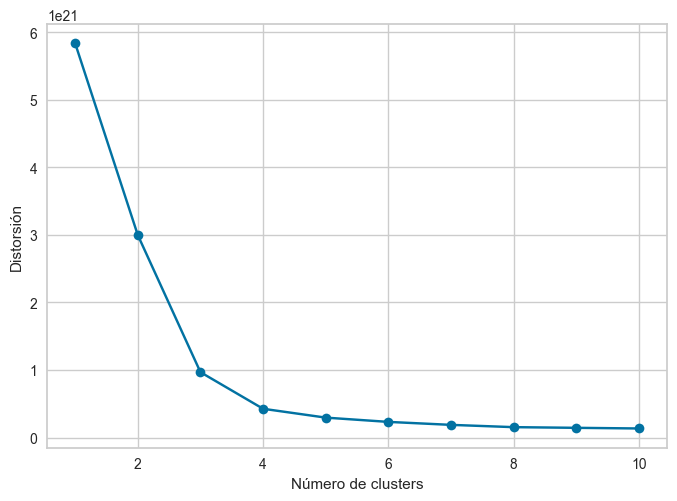

In [5]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorsión')
plt.show()

Como se puede ver en la gráfica no hay un número de clusters evidente, pero a partir del número 4 la distorsión empieza a reducirse de manera más lenta por lo que este puede ser un buen número de clusters para la implementación.

In [6]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(df.iloc[:,:])
y_kmeans = kmeans.predict(df)
df['kmean'] = kmeans.labels_
df['kmean'].value_counts()

0    910
3     37
1     16
2     10
Name: kmean, dtype: int64

Se puede ver que la cantidad de empresas por cluster es parecida

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GRUPO EN NIIF', ylabel='VARIACION ACTIVOS'>

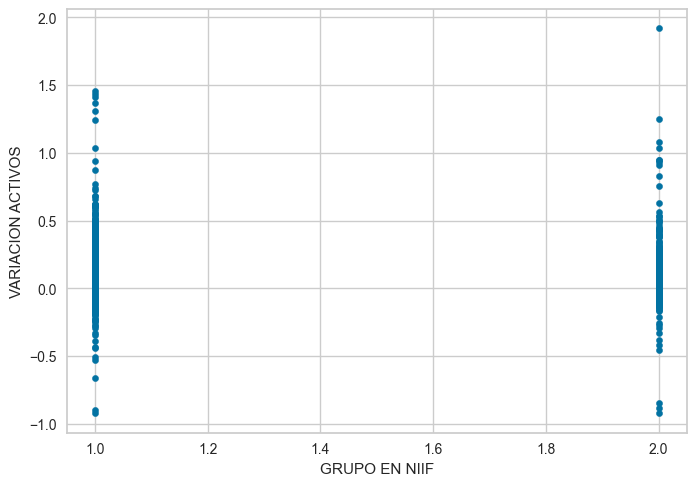

In [7]:
df.plot(kind='scatter', x='GRUPO EN NIIF', y = 'VARIACION ACTIVOS')

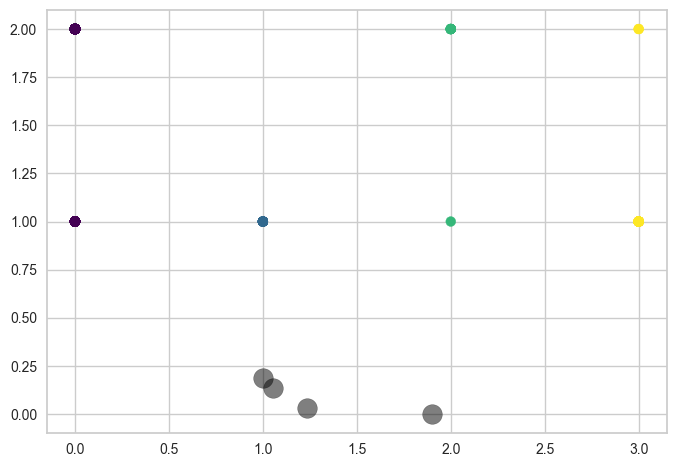

In [8]:
plt.scatter(df.iloc[:, -1].values, df.iloc[:, 0].values, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

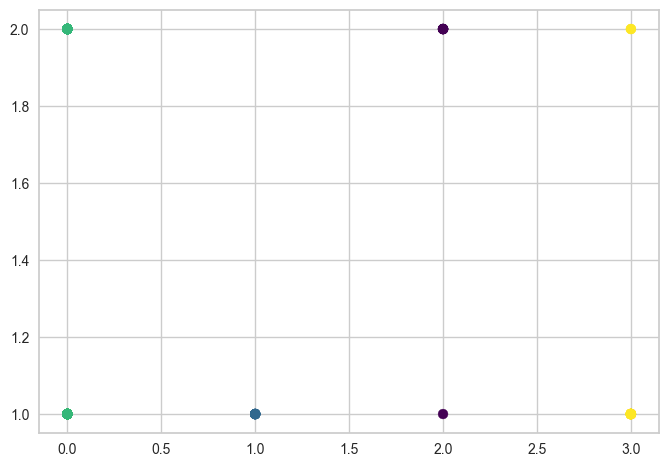

In [9]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(df, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(df.shape[0])[:n_clusters]
    df.to_numpy()
    centers = df.iloc[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(df, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([df[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(df, 4)
plt.scatter(df.iloc[:, -1].values, df.iloc[:, 0].values, c=labels,
            s=50, cmap='viridis')

Para medir la eficacia del modelo se utilizará el Silhouette Score que nos indica que tan bien agrupados están los datos en cada cluster. Se busca que el valor obtenido sea lo más cercano a uno (1) posible.

In [10]:
score = silhouette_score(df, km.labels_, metric='euclidean')
print('Silhouette score: %.3f' % score)


Silhouette score: 0.589


El valor de la Silhuette obtenido en este caso fue de 0.397 lo cual no es lo ideal, esto significa que hay clusters que se están sobrelapando o que están muy cerca el uno del otro.

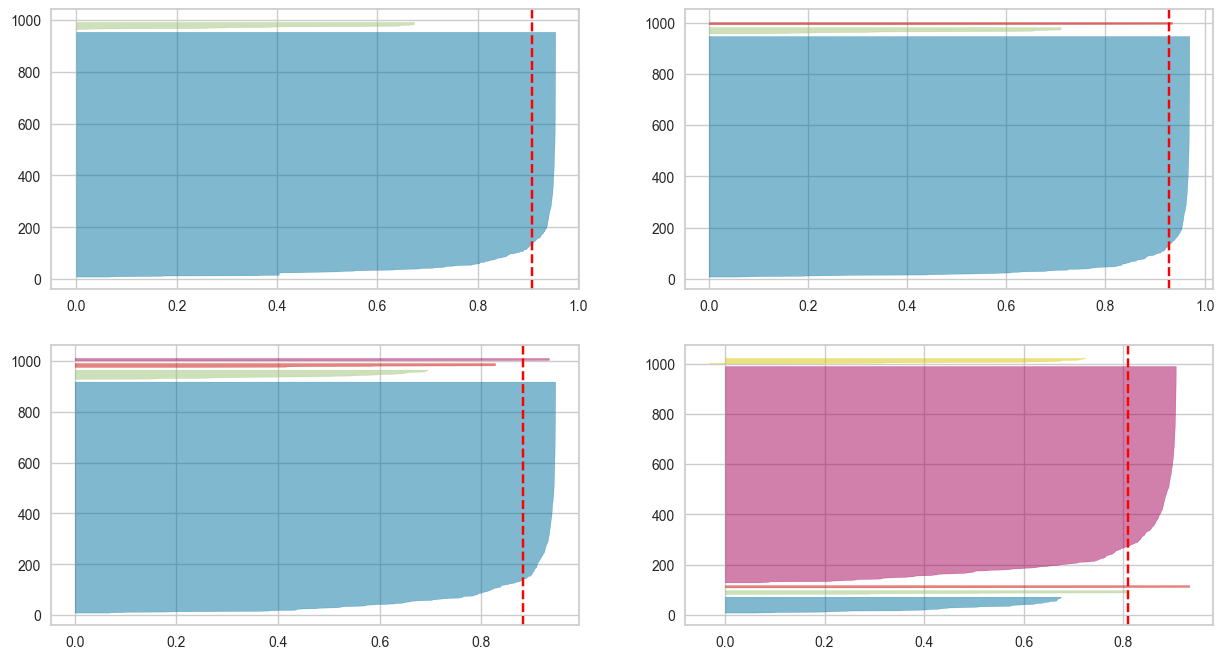

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

Se muestran 4 gráficas diferentes donde se va desde 2 clusters hasta 5 y se ve el valor del silhouette promedio (linea discontinua roja) por cada grupo de clusters diferente. Se puede ver que en el grupo de 4 clusters es donde se obtiene un coeficiente mayor que en los demás, siendo la gráfica con 5 clusters el más cercano.

In [13]:
df_clusterd = df.copy()
df_clusterd['cluster'] = km.labels_
df_clusterd.sample(5)

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,...,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS,GANANCIA (PERDIDA) PROMEDIO,kmean,cluster
62,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0.073689,64490475.0,0,3
558,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0.060390,167930470.0,0,3
149,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0.200142,159252670.0,0,3
651,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0.264855,103313970.0,0,3
803,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,-0.104868,81609655.0,0,3


In [14]:
from pathlib import Path

try:
    filepath = Path('data/clustered_data_kmeans.csv')
    df_clusterd.to_csv(filepath, index=False)
    print("Archivo guardado exitosamente")
except:
    print("Error al guardar el archivo")

Archivo guardado exitosamente
